# Bayes Universe



Overview and Motivation: Geben Sie einen Überblick über die Projektziele (Ziele der Seminararbeit) und die Motivation für das Projekt ( Datensatz, Problemstellung, Idee,...). Bedenken Sie, dass dies auch von Personen gelesen wird, die Ihren Projektvorschlag nicht gesehen haben.

Related Work: Alles, was Sie inspiriert hat, z.B. eine Arbeit, eine Website oder etwas, das wir im Unterricht diskutiert haben.

Initial Questions: Welche Fragen versuchen Sie zu beantworten? Wie haben sich diese Fragen im Laufe des Projekts entwickelt? Welche neuen Fragen haben Sie im Laufe Ihrer Analyse berücksichtigt?

Data: Source, scraping method, cleanup, storage, etc.

Exploratory Data Analysis: Welche Visualisierungen haben Sie verwendet, um Ihre Daten auf unterschiedliche Weise zu betrachten? Welche verschiedenen statistischen Methoden haben Sie in Betracht gezogen? Begründen Sie die Entscheidungen, die Sie getroffen haben, und zeigen Sie alle wichtigen Änderungen Ihrer Ideen auf. Wie sind Sie zu diesen Schlussfolgerungen gekommen?

Bringen Sie alle Themen in Bezug - Wenn etwas nicht möglich sein sollte, gibt es andere Umstände, wo z.b. Reinforcement Learning durchaus nützlich/notwendig sein könnte?

Final Analysis: Was haben Sie über die Daten erfahren? Wie haben Sie die Fragen beantwortet? Wie können Sie Ihre Antworten rechtfertigen?

In [25]:
#Packages 

from IPython.display import Image
import numpy as np
from scipy.special import gamma
from scipy.stats import beta
from matplotlib import pyplot as plt

# Probability - A philosophical question

What is probabilty? This seemingly trivial question leads to stark differencen in analytical approaches.
Generally, frequentists are primarily concerned with the past, while Bayesians are focused on the future. The difference 
in perspective stems from two distic definitions of if probabiltity:
Frequentist - defines probability through repeated measurements of events of past events
Bayesian - defines probabitly throught prior information about an events

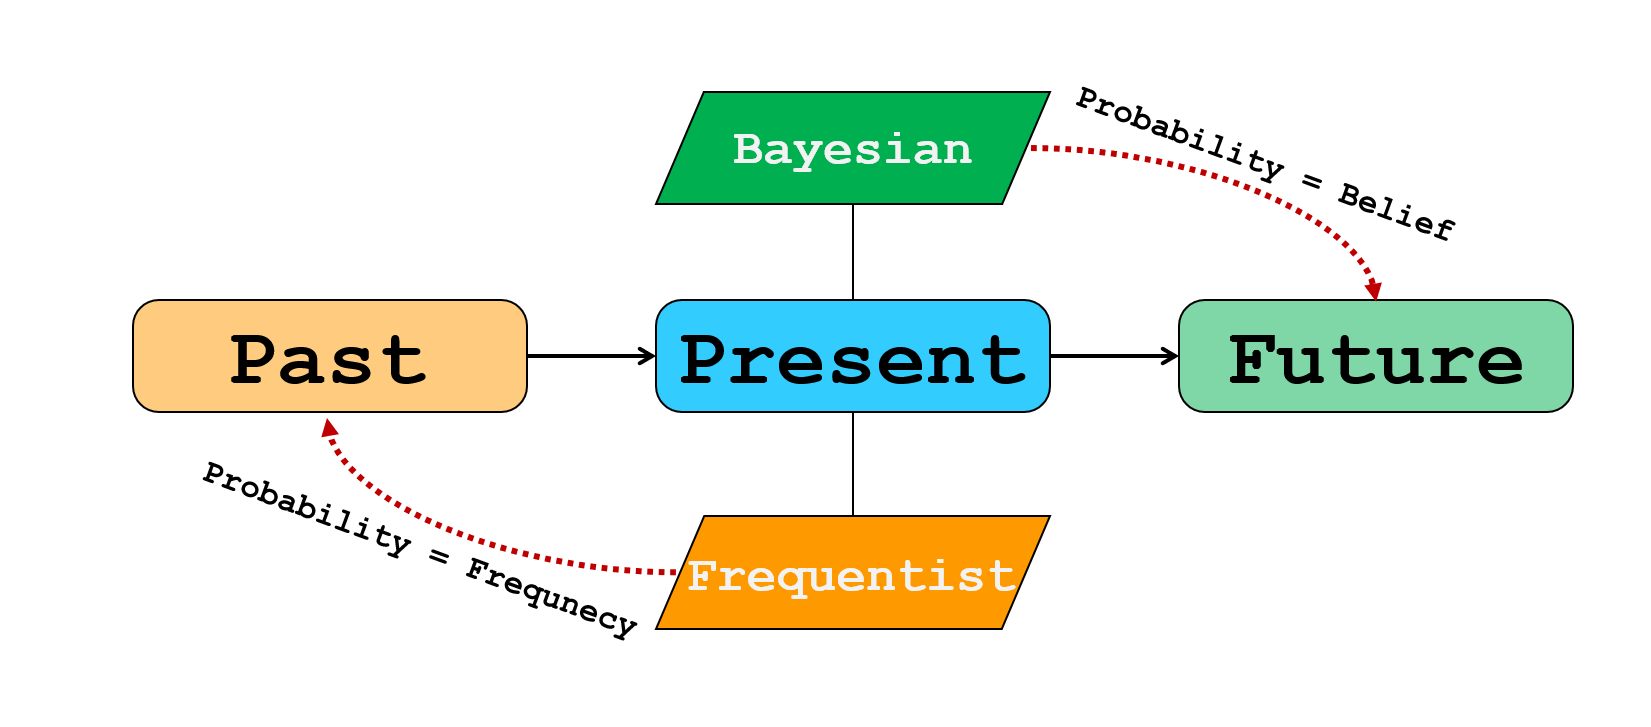

In [16]:
Image(filename="img/What-Is-Probability.png")

# Bayes Theorem

For two events A and  B with P(B)> 0 the probability of  A can be determined under the condition that B has been 
calculated by the probability of B under the condition that  has occurred. This can be written as follows (note that
the notation chosen fits Machine Learning purposes):

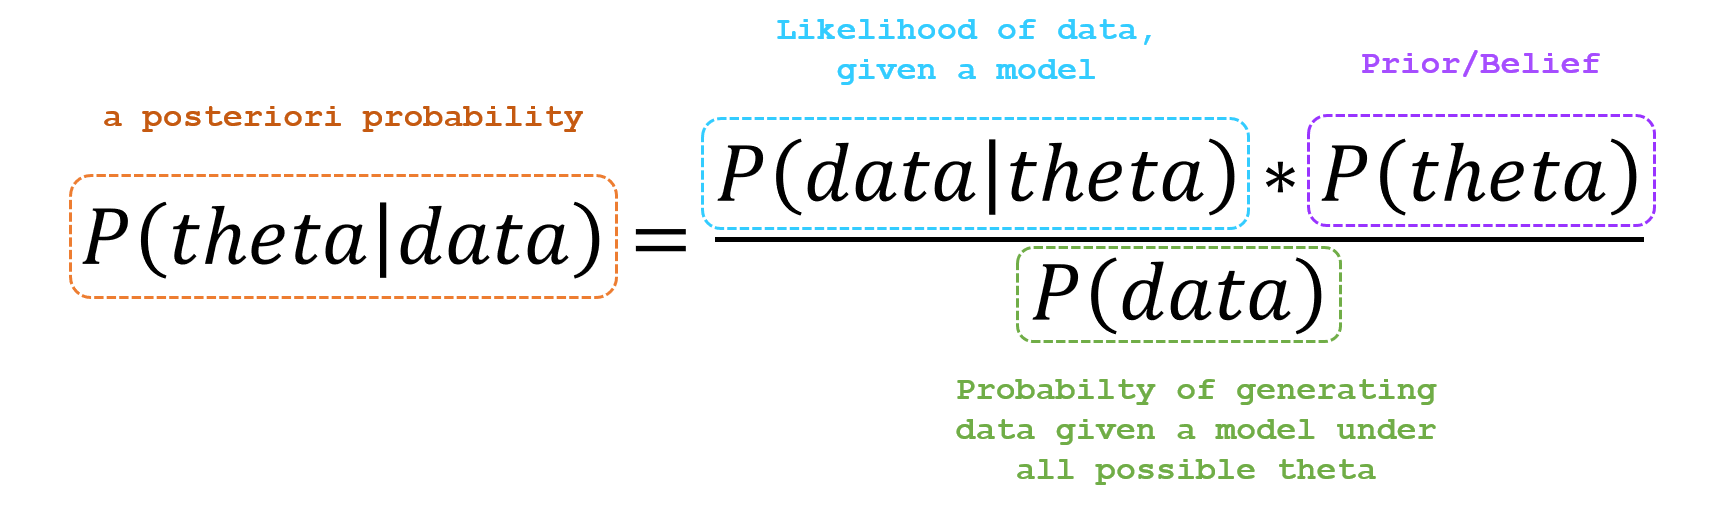

In [78]:
Image(filename= "img/Bayes Theorem.png")



P(theta|data) is the probabitly distribtuon over model parameters we get, after taking into account prior beliefs and information
P(data|theta) is the probability defined by a specific model and its parameters
P(theta) is our belief or prior knowledge regarding model parameter
P(data) reflects the probabilty of deriving this data from a spcific model, considering all possible thetas. 
Hence, P(data) can be expressed as follows:

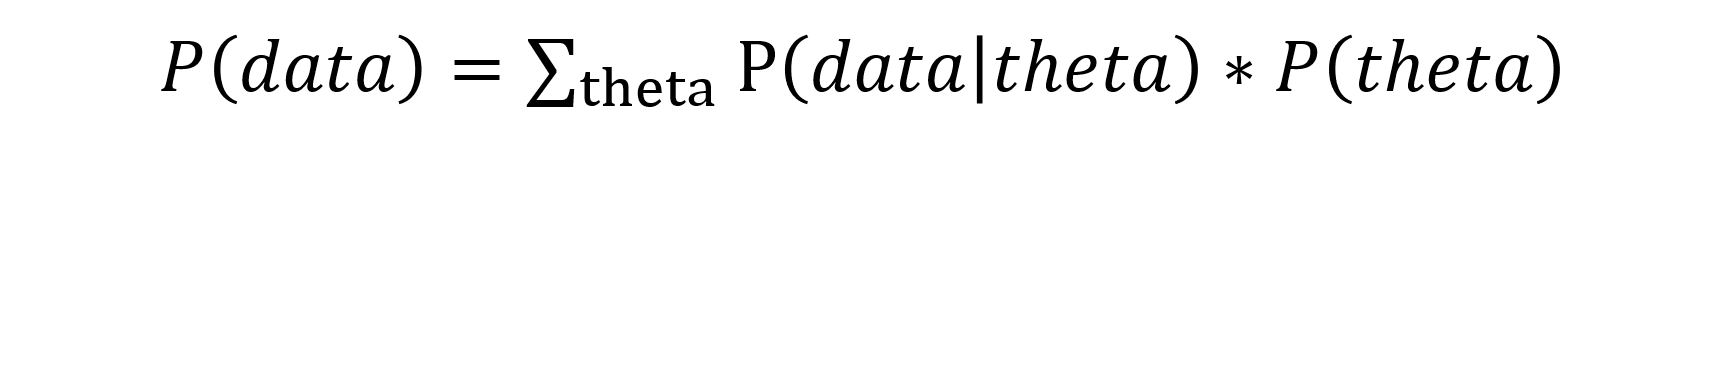

In [79]:
Image(filename="img/Formel2.png")

Incorporating this expression in to Bayes Rule gives:

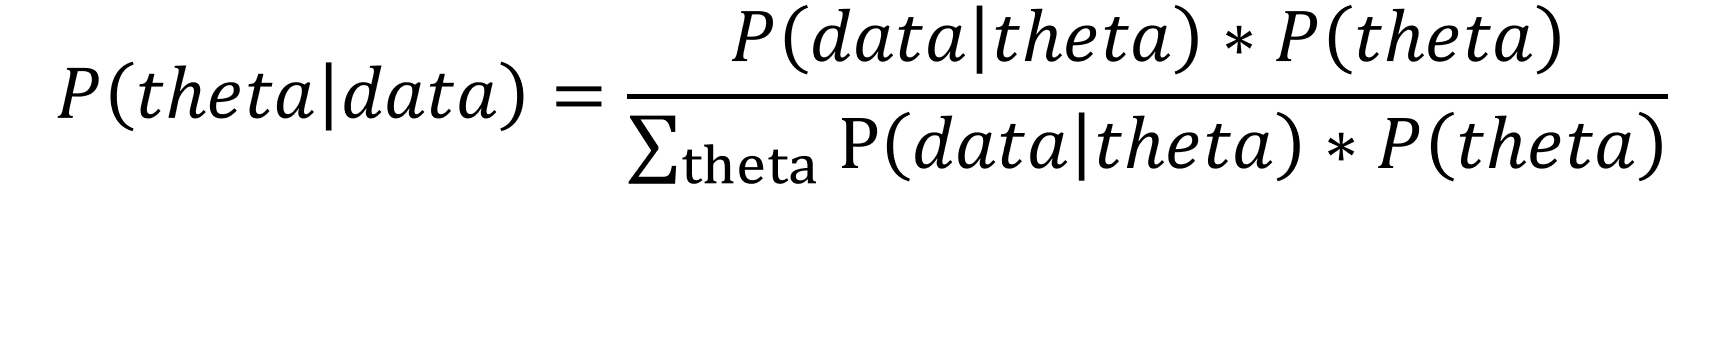

In [80]:
Image(filename="img/Formel3.png")


# Maximum Likelihood Estimation - MLE

    • Maximum likelihood estimation (MLE), is a framework for inference for finding the best statistical estimates of parameters from historical training data.
    • MLE can be defined as a method for estimating parameters (such as the mean or variance ) from sample data such that the probability (likelihood) of obtaining the observed data is maximized.
    • A common modeling problem involves how to estimate a joint probability distribution for a dataset.
    • The joint probability distribution can be restated as the multiplication of the conditional probability for observing each example given the distribution parameters.
    • Density estimation involves selecting a probability distribution function and the parameters of that distribution that best explain the joint probability distribution of the observed data (X).
    • In MLE, we wish to maximize the probability of observing the data from the joint probability distribution given a specific probability distribution and its parameters
    • One way to interpret MLE is to view it as minimizing the dissimilarity between the empirical distribution […] defined by the training set and the model distribution, with the degree of dissimilarity between the two measured by the KL divergence. […] Minimizing this KL divergence corresponds exactly to minimizing the cross-entropy between the distributions.

MLE gives a point esteimate for theta that maximizes P(data|theta)

# Maximimum A Posteriori Estimation - MAP

Maximimum A Posteriori Estimation follows a similar approach then MLE, but assumes a uniform prior distribution of the parameters. One
major difference is that under MAP, prior information is taken if into if not account.
MAP gives a point estimate for theta that maximizes the posteriori probablity P(theta|data)
This can be seen as a cyclical approach, where one starts of with an inital prior, observes new samples and takes new information into account.
This leads to an updated prior, the postariori prior. This updated prior is fed back to the initial model and serves as new prior. 
This cycle is depicted in the following graphic:   

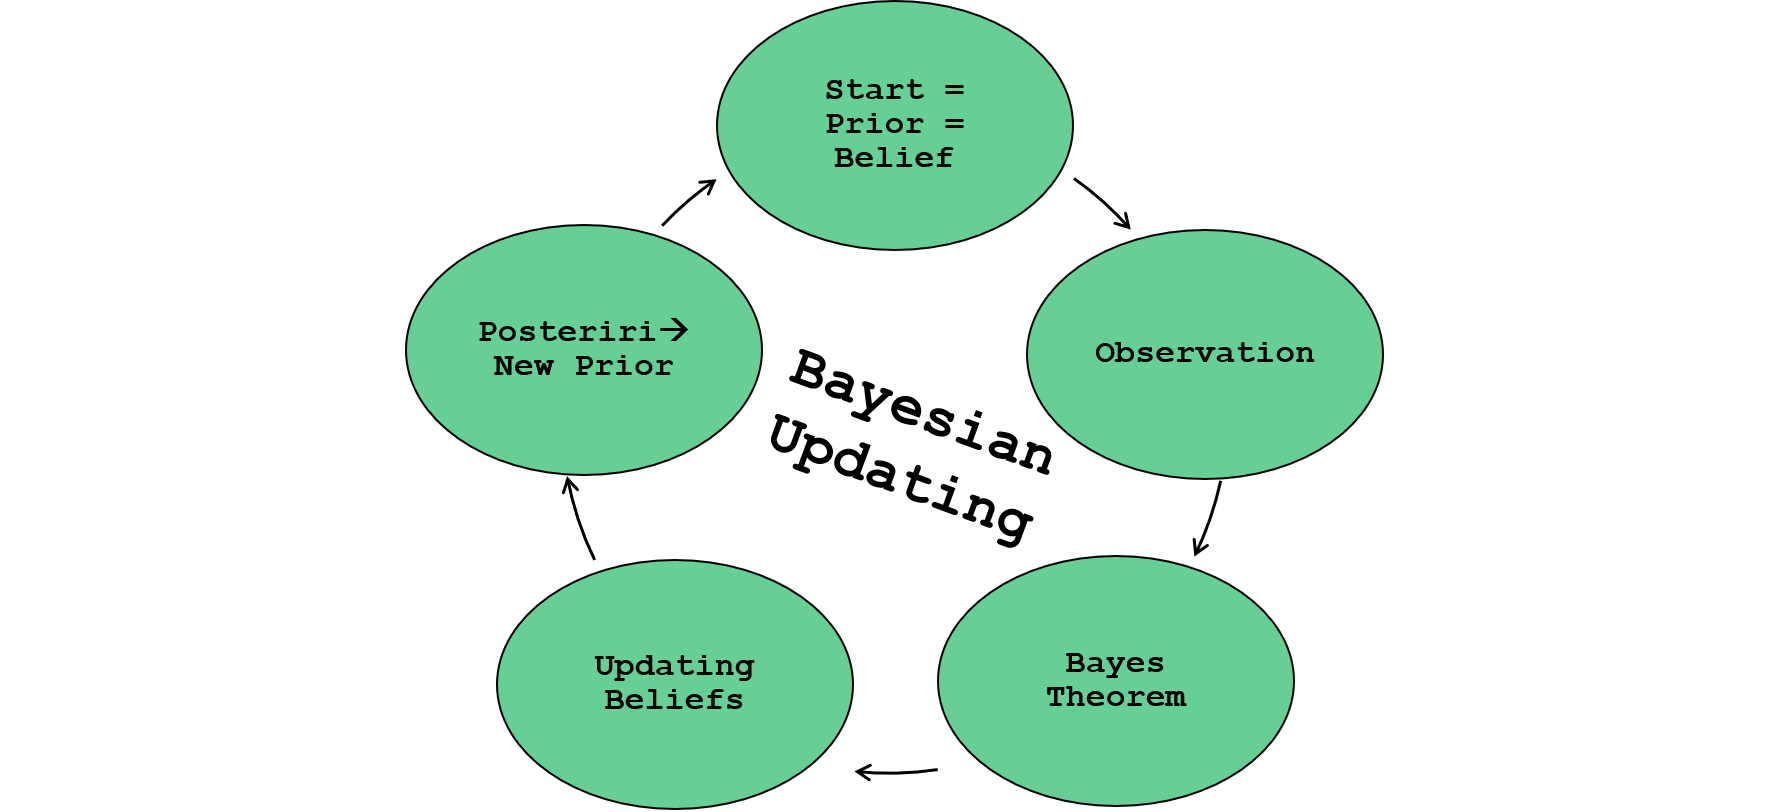

In [81]:
Image(filename="img/Bayesian-Updating.png")

#Bayesina Inference

Both Bayesian Inference as well as MAP rest on Bayes's theorem.
Unlike MLE or MAP, Bayesian infernce gives the full the posterior probability distribution, which is called density or mass function
The major computational difference is that under Bayes's theorem we need to calculate P(data), also called marginal likelyhood.
P(data) is the denominator in the above stated forumula and ensures the integrated sum of P(theta|data) over all possible thetas becomes 1 (If theta is a discrete variable). 
This is called marginalization, which essentially involves summing over all possible values of one variable to determine the marginal contribution of another
The variable which is summed up is called the nuisance variable.
Integrating the denominator with respect to nuisance variable is only necessary if the scale of variable at hand is within given boundaries (continuous variable).
Othierwise summing up the element in the denominator does the job. 




# Chain Rule for probability
In the calculations above we actually used a fairly common probabilistic procedure without even realising it.
The result we used is the chain rule for probability (not to be confused with the chain rule for differentiation). It states that

# MLE vs MAP vs Bayes Inference

Consinder a Counter-Strike Go E-Sports tournament one vs. one match. There are two player:
Palyer X has a record of 241 mateches with 162 wins 
Player Y has a record of 8 matches with 6 wins

Let a=b=2 be hyperparameters of a Beta distribution (discussed in further detail below)

Assume, that player X last season player A won 50% of games. Since player Y did not participate in the CS Go league last year, we also assume a 50% winning not chance.
Furher assume that winning/losing follows a Bernoulli trial with winning probabitly theta, which is defined through:
bernoullitrail.png

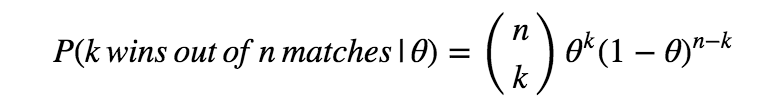

In [82]:
Image(filename="img/bernoullitrail.png")


In [4]:
#Player X
x = 162
x_n = 231

#Player Y
y = 6
y_n = 8

# beta parameters
a = 2
b = 2


# MLE - Example

In [84]:
#Calculating MLE
MLE_X = x / x_n
MLE_Y =  y / y_n
print("MLE for player x", MLE_X)
print("MLE for player x", MLE_Y)



MLE for player x 0.7012987012987013
MLE for player x 0.75


# MAP - Example

To calculate MAP, we use Bayes Theorem. 
Since we are only interested in finding a value for theta that maximizes P(theta|data), 
we can ingnore P(data) since it is independent to theta. Thus the following formula applies

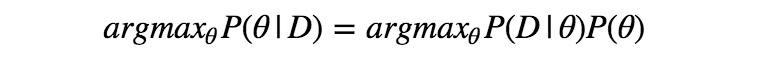

In [85]:
Image(filename="img/MAP.PNG")

For computational simplicity, we use a Beta distributon

The beta distribution is a family of continuous probability distributions over the interval(0,1),
parameterized by two parameters (α and β) In this example the beta distribution is used as the conjugated a priori probability distribution for the Bernoulli distribution.
The following formula defines the beta distribution:

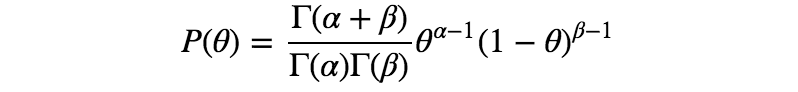

In [86]:
Image(filename="img/Beta.png")

The Beta distribution's hyperparameters cannot be determinded by data. They are set based on prior knowledge.
Note that if a = b = 1 than this represents zero prior knowldege and MAP would be equal to MLE
The following sections illustrates the beta distributon's parameter dependency

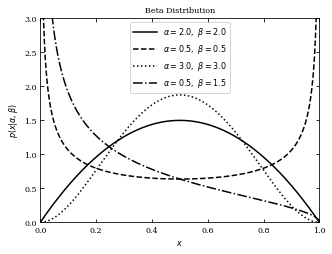

In [87]:
# Plotting Beta distributons
# Define the distribution parameters to be plotted
alpha_values = [2, 0.5, 3.0, 0.5]
beta_values = [2, 0.5, 3.0, 1.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')

plt.legend(loc=0)
plt.show()



Combining the Bernoulli distributon with the Beta distributon yields:

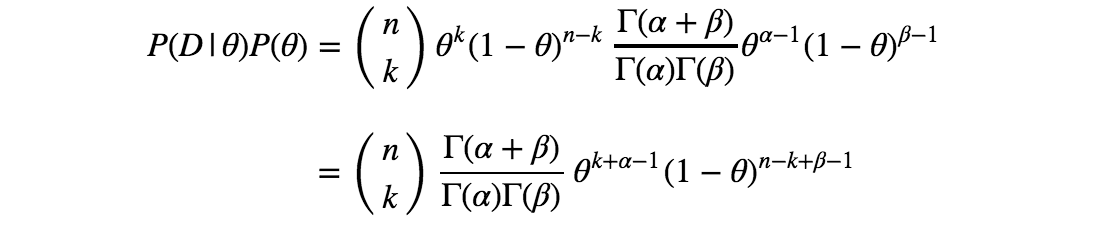

In [88]:
Image(filename="img/Binomial+Beta.png")


Adding the denomiator (marginalization term) gives:

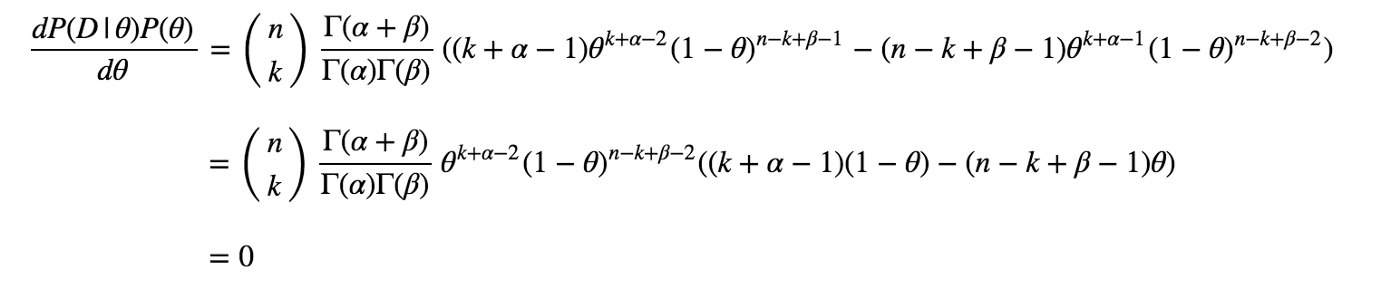

In [89]:
Image(filename="img/posteriori1.png")

this can be simplified to:

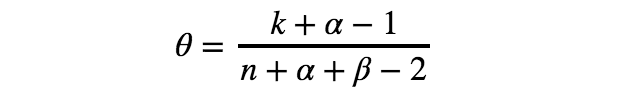

In [90]:
Image(filename="img/posteriori2.png")

In [5]:
MAP_X = (x + a -1) / (x_n + a + b - 2)
MAP_Y = (y + a -1) / (y_n + a + b - 2)

print("MAP for Player X", MAP_X)
print("MAP for Player Y", MAP_Y)

MAP for Player X 0.6995708154506438
MAP for Player Y 0.7


Under MAP, both player appear to be equally likley to win the match

# Bayesian Inference Example

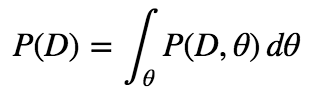

In [17]:
# #alculating pasteriori probabitly distribution
Image(filename="img/Ptheta.png")

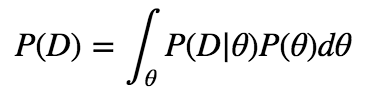

In [18]:
# The chain rule of probabilry gives:
Image(filename="img/chainruleptheta.png")

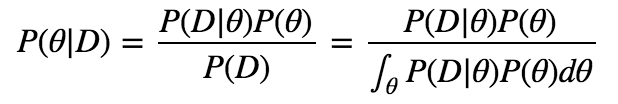

In [19]:
# which leads to
Image(filename="img/BayesInference1.png")

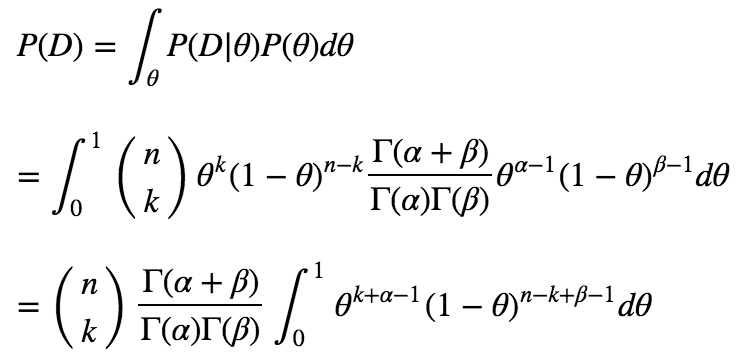

In [20]:
# following theses steps 
Image(filename="img/BiDist1.png")
Image(filename="img/betadist1.png")
Image(filename="img/Binomial+Beta2.png")
Image(filename="img/Ptheta2.png")

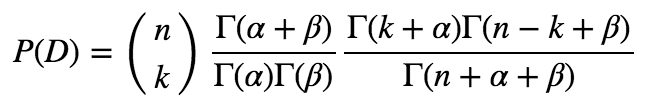

In [22]:
#With Euler integral of the first kind, the above formula can be deformed to below.

Image(filename="img/Ptheta3.png")

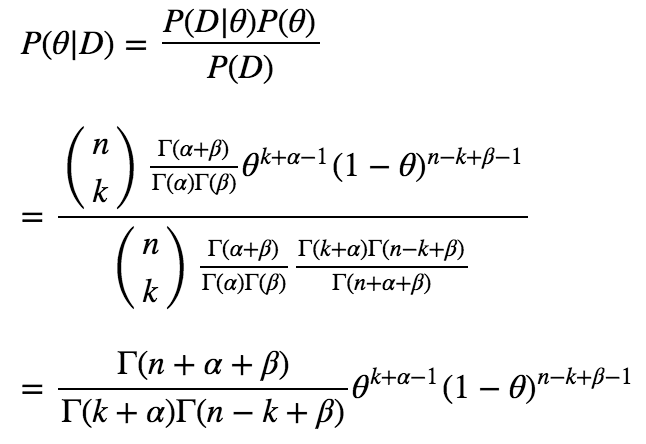

In [24]:
#Finally, we can obtain P(θ|D) as below.
Image(filename="img/BayesFinal.png")






In [13]:
def posteriori(k, n, a, b):
    posteriori_p = []
    theta = np.arange(0, 1., 0.01).tolist()
    for i in theta:
        p = (gamma(n+a+b) / (gamma(k+a) * gamma(x_n-k+b))) * (i**(k+a-1)) * ((1-i)**(n-k+b-1))
        posteriori_p.append(p)
    return posteriori_p

In [10]:
def posteriori_test(k, n, a, b):
    posteriori_p = []
    theta = np.arange(0, 1., 0.01).tolist()
    for i in theta:
        p = (factorial(n+a+b -1) / (factorial(k+a-1) * factorial(x_n-k+b-1))) * (i**(k+a-1)) * ((1-i)**(n-k+b-1))
        posteriori_p.append(p)
    return posteriori_p





In [14]:
posteriori(x, x_n, a, b)



/home/tusoteuthis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/home/tusoteuthis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
we often don’t calculate the denominator, P(data), also known as the normalisation constant,
because in many cases it can be too hard to calculate and we don’t always need it.
Explicitly we are integrating the right hand side through all possible values of the parameters. 
In some cases we can evaluate this expression, either exactly or approximately, so that we can get a normalised posterior distribution

As seen above, Bayesian inference provides much more information than point estimators like MLE and MAP. However, it also has a drawback — the complexity of its integral computation. 
The case in this article was quite simple and solved analytically, but it’s not always the case in real-world applications.
We then need to use MCMC or other algorithms as a substitute for the direct integral computation.


"""diesen Absatz umschreiben und Überleitung zu Simulationen schaffen"""

# Sources

http://fastml.com/bayesian-machine-learning/
http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/
https://towardsdatascience.com/probability-concepts-explained-marginalisation-2296846344fc
https://towardsdatascience.com/mle-map-and-bayesian-inference-3407b2d6d4d9
https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-and-maximum-a-posteriori-estimation-d7c318f9d22d


In [ ]:
# Monty Hall Algorithm
https://www.norwegiancreations.com/2018/10/bayes-rule-and-the-monty-hall-problem/

In [ ]:
import numpy as np
from scipy.special import gamma
import pylab

# The Gamma function
ax = pylab.linspace(-5, 5, 1000)
pylab.plot(ax, gamma(ax), ls='-', c='k', label='$\Gamma(x)$')

# (x-1)! for x = 1, 2, ..., 6
ax2 = pylab.linspace(1,6,6)
xm1fac = np.array([1, 1, 2, 6, 24, 120])
pylab.plot(ax2, xm1fac, marker='*', markersize=12, markeredgecolor='r',
           markerfacecolor='r', ls='',c='r', label='$(x-1)!$')

pylab.ylim(-50,50)
pylab.xlim(-5, 5)
pylab.xlabel('$x$')
pylab.legend()
pylab.show()